# 📘 Lab Session 4: Building a Scorecard with Logistic Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
loan_data = pd.read_csv('loans_data.csv')

In [3]:
loan_data.head()

,id,acc_now_delinq,addr_state,annual_inc,delinq_2yrs,dti,emp_length,grade,home_ownership,initial_list_status,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,purpose,term,total_acc,total_rev_hi_lim,verification_status,good_bad
0,1077501,0.0,AZ,24000.0,0.0,27.65,10+ years,B,RENT,f,...,NaN,NaN,3.0,0.0,credit_card,36 months,9.0,5000.0,Verified,1.0
1,1077430,0.0,GA,30000.0,0.0,1.00,< 1 year,C,RENT,f,...,NaN,NaN,3.0,0.0,car,60 months,4.0,2500.0,Source Verified,0.0
2,1077175,0.0,IL,12252.0,0.0,8.72,10+ years,C,RENT,f,...,NaN,NaN,2.0,0.0,small_business,36 months,10.0,2400.0,Not Verified,1.0
3,1076863,0.0,CA,49200.0,0.0,20.00,10+ years,C,RENT,f,...,35.0,NaN,10.0,0.0,other,36 months,37.0,10000.0,Source Verified,1.0
4,1075358,0.0,OR,80000.0,0.0,17.94,1 year,B,RENT,f,...,38.0,NaN,15.0,0.0,other,60 months,38.0,3000.0,Source Verified,1.0


## 🧩 Section 1 – Dataset Understanding

### Dataset Shape

In [13]:
loan_data.shape

(466285, 24)

### Dataset Types

In [14]:
loan_data.dtypes

,0
id,int64
acc_now_delinq,float64
addr_state,object
annual_inc,float64
delinq_2yrs,float64
dti,float64
emp_length,object
grade,object
home_ownership,object
initial_list_status,object


### Missing Values

In [15]:
loan_data.isnull().mean()*100

,0
id,0.000000
acc_now_delinq,0.000000
addr_state,0.000000
annual_inc,0.000000
delinq_2yrs,0.000000
dti,0.000000
emp_length,4.505399
grade,0.000000
home_ownership,0.000000
initial_list_status,0.000000


### ❓ Question: How can we identify and handle missing values

*   List item
*   List item

in non-numerical (categorical) columns?

In [17]:
cat_cols = loan_data.select_dtypes(include=['object']).columns
cat_cols

Index(['addr_state', 'emp_length', 'grade', 'home_ownership',
       'initial_list_status', 'purpose', 'term', 'verification_status'],
      dtype='object')

In [27]:
# TODO: Write your code here
cat_cols = loan_data.dtypes[loan_data.dtypes == 'object'].index
for cols in cat_cols:
    print(f"Column: {cols}")
    print(loan_data[cols].unique())
    print("------")

Column: addr_state
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
------
Column: emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
------
Column: grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
------
Column: home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
------
Column: initial_list_status
['f' 'w']
------
Column: purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
------
Column: term
[' 36 months' ' 60 months']
------
Column: verification_status
['Verified' 'Source Verified' 'Not Verified']
------


## General Preprocessing

### Convert Emp length to Numerical

In [18]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', '0')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', '0')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('+', '', regex=False)

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipython-input-1858947702.py:1: SyntaxWarning: invalid escape sequence '\+'
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [19]:
type(loan_data['emp_length_int'][0])


str

In [20]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

### Convert Term to Numerical

In [21]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')


In [22]:
loan_data['term_int']= pd.to_numeric(loan_data['term_int'])

In [23]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].median(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

/tmp/ipython-input-666814896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['annual_inc'].fillna(loan_data['annual_inc'].median(), inplace=True)
/tmp/ipython-input-666814896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

## 🧩 Section 2 – Exploratory Data Analysis (EDA)

### The distribution of the target variable

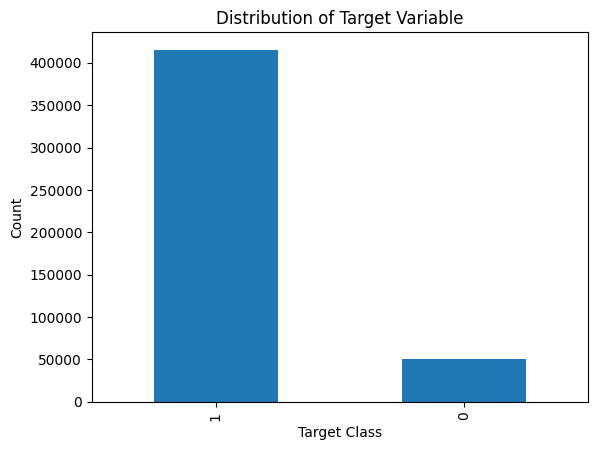

In [24]:
loan_data["good_bad"].value_counts().plot(kind="bar")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

### Box plots with respect to Target variable

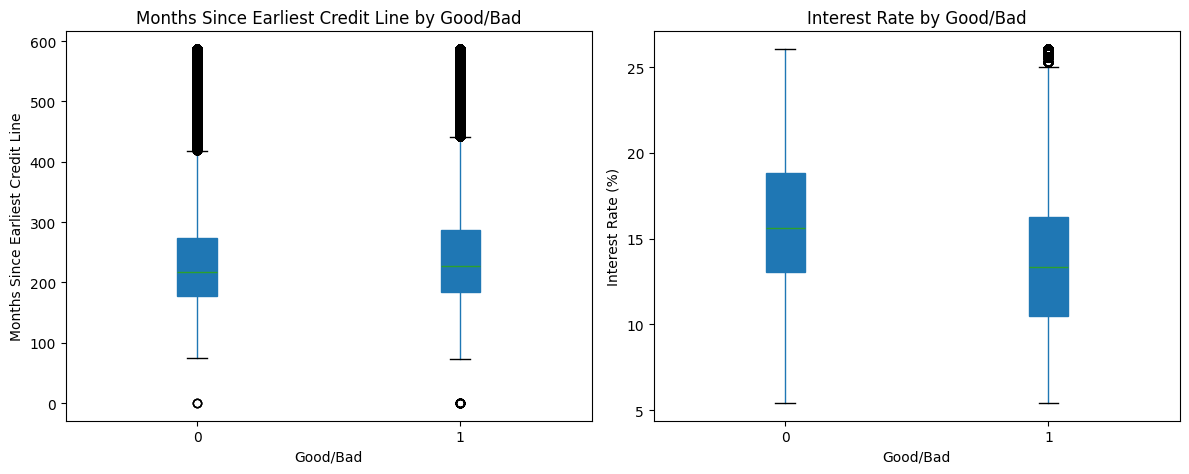

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot 1: mths_since_earliest_cr_line ---
loan_data.boxplot(
    column=["mths_since_earliest_cr_line"],
    by="good_bad",
    ax=axes[0],
    grid=False,
    patch_artist=True
)
axes[0].set_title("Months Since Earliest Credit Line by Good/Bad", fontsize=12)
axes[0].set_xlabel("Good/Bad")
axes[0].set_ylabel("Months Since Earliest Credit Line")

# --- Plot 2: int_rate ---
loan_data.boxplot(
    column=["int_rate"],
    by="good_bad",
    ax=axes[1],
    grid=False,
    patch_artist=True
)
axes[1].set_title("Interest Rate by Good/Bad", fontsize=12)
axes[1].set_xlabel("Good/Bad")
axes[1].set_ylabel("Interest Rate (%)")

# Improve spacing / cleanup
plt.suptitle("")
plt.tight_layout()
plt.show()


### Creating Dummy Variables (One-Hot Encoding)

In [ ]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [ ]:
loan_data.head()

In [ ]:
from sklearn.model_selection import train_test_split

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(
    loan_data.drop('good_bad', axis=1),
    loan_data['good_bad'],
    test_size=0.2,
    random_state=42
)

In [ ]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

## 🧩 Section 3 – Weight of Evidence (WoE) & Information Value (IV)

### 🔹 Fine Classing

In [ ]:
df_inputs_prepr['emp_length_int'].unique()

In [ ]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

### 🔹 Coarse Classing


###     🔹Categories

In [ ]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])


In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [ ]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [ ]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### ❓ Question: How to Do Coarse Classing for purpose


In [ ]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

### 🔹 Continuous

In [ ]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)


In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [ ]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

In [ ]:
plot_by_woe(df_temp, 90)


In [ ]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

### ❓ Question: How to Do Coarse Classing for emp_length_int


####

## Section 4 – Model Building

In [ ]:
dummy_cols = [
 'home_ownership:MORTGAGE',
 'home_ownership:OWN',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'verification_status:Verified',
 'purpose:credit_card',
 'purpose:debt_consolidation',
 'addr_state:CA',
 'addr_state:NY',
 'term:36',
 'term:60',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'addr_state:NM_VA',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:GA_WA_OR',
 'addr_state:WI_MT',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'purpose:oth__med__vacation',
 'purpose:major_purch__car__home_impr',
 'int_rate:<9.548',
 'int_rate:9.548-12.025',
 'int_rate:12.025-15.74',
 'int_rate:15.74-20.281',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'mths_since_earliest_cr_line:141-164',
 'mths_since_earliest_cr_line:165-247',
 'mths_since_earliest_cr_line:248-270',
 'mths_since_earliest_cr_line:271-352',
 'mths_since_earliest_cr_line:>352',
 'emp_length:0',
 'emp_length:1',
 'emp_length:2-4',
 'emp_length:5-6',
 'emp_length:7-9',
 'emp_length:10'

]

In [ ]:
logistic_regression_inputs =df_inputs_prepr[dummy_cols]

In [ ]:
ref_categories = [
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'term:60',
 'emp_length:0',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140'
]

In [ ]:
logistic_regression_inputs = logistic_regression_inputs.drop(ref_categories,axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()
reg.fit(logistic_regression_inputs, df_targets_prepr)

In [ ]:
feature_name = logistic_regression_inputs.columns.values
feature_name

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

In [ ]:
min_score = 300
max_score = 850

In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score.
df_scorecard

In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

In [ ]:
df_scorecard